<a href="https://colab.research.google.com/github/Thasan112/Adventureworks_Power-BI/blob/main/House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
shree1992_housedata_path = kagglehub.dataset_download('shree1992/housedata')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


In [ ]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df= pd.read_csv('/kaggle/input/housedata/data.csv')

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## Initial Data Review: Key Insights

After examining the first five rows of the dataset, several important observations emerged:

- **🎯 Target Variable**  
  The `price` column is the target variable, representing the sale price of the houses. It will be the focus of our regression modeling.

- **🕒 Temporal Feature**  
  The `date` column captures when the house was sold. This may offer opportunities for time-based feature engineering or time-series analysis.

- **🏠 Numerical Features**  
  Columns such as `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, `floors`, and `yr_built` are numerical and represent the physical characteristics of the properties.

- **🧮 Encoded Categorical Features**  
  Features like `waterfront`, `view`, and `condition` are numerically encoded but likely represent categorical information. These may require transformation into categorical types or one-hot encoding.

- **📍 Location Data**  
  Fields like `street`, `city`, `statezip`, and `country` provide geographic context. While `city` and `statezip` could be informative, free-text columns like `street` may need preprocessing or could be excluded depending on model requirements.

---

Overall, the dataset appears rich and well-suited for predictive modeling.  
**Next Step ➡️** Examine data types and check for missing values to prepare for deeper analysis.


**Exploration of the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

The dataset contains a total of 18 columns and 4,600 rows

## 💡 Observations on Data Types

- **📝 Object-Type Columns**  
  Features such as `date`, `street`, `city`, `statezip`, and `country` are of type `object` (text). These will likely require preprocessing — such as parsing dates, encoding categorical values, or dropping non-informative fields — before they can be used in modeling.

- **📆 Temporal Features**  
  Columns like `yr_built` and `yr_renovated` are numeric, but may hold more value when treated as temporal or categorical features, depending on the modeling context.

- **🔢 Numerical Features**  
  Columns including `price`, `bedrooms`, `bathrooms`, and `sqft_living` are numerical (`int64` or `float64`) and appear well-suited for regression tasks.

- **🔄 Encoded Categorical Features**  
  Features like `waterfront`, `view`, and `condition` are numerically encoded but represent categorical properties. These should be converted to categorical variables or appropriately encoded (e.g., one-hot encoding or label encoding) to improve model performance.

---

Overall, the dataset appears clean, well-organized, and structurally sound for predictive modeling.

**Next Step ➡️** Generate statistical summaries to explore the distribution and central tendencies of each feature.


**Statistical Summary**

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


## 📊 Statistical Summary Insights

- **💰 Price Variable**  
  The `price` column has a **minimum value of 0**, which likely indicates a missing or incorrectly recorded entry. I will visualize these values to determine if they are genuine or outliers.  
  The **average price** is approximately **$551,000**, while the **maximum value** reaches an extreme **$26,590,000**, suggesting the presence of strong outliers.

- **📐 Skewed Numerical Features**  
  Features like `sqft_living`, `sqft_lot`, and `sqft_basement` show **maximum values far above the median**, indicating **right-skewed distributions**. These may require transformation (e.g., log scaling) or outlier treatment.

- **🛏 Bedrooms Anomaly**  
  The `bedrooms` feature ranges from **0 to 9**. A value of **0 bedrooms** raises a flag — it's worth investigating whether these are valid studio listings or data entry errors.

- **🛁 Bathrooms Check**  
  Similarly, the `bathrooms` column has a **minimum of 0**, which is questionable. I plan to examine how many entries have zero bathrooms and decide whether to exclude, impute, or treat them separately.

- **🏚 Renovation Status**  
  The `yr_renovated` column has a **median of 0**, indicating that most homes have **never been renovated**. This feature could be simplified into a binary variable such as `HasBeenRenovated` for clearer interpretation.

- **🏠 Floors Distribution**  
  The `floors` feature ranges from **1 to 3.5** and appears within a reasonable range — no anomalies detected here.

- **🧮 Categorical Interpretation Needed**  
  Columns like `waterfront`, `view`, and `condition`, while numerically encoded, represent **categorical information**. These will be converted into appropriate categorical formats during preprocessing.

---

👉 **Summary**:This statistical analysis has revealed both potential data quality issues (e.g., zero values, outliers) and opportunities for **feature engineering** (e.g., binary renovation status).  
**Next Step ➡️** Conduct correlation analysis and visualize outliers to better understand feature relationships and detect anomalies.


**Exploratory Data Visualization (EDA)**

## 🔍 Exploratory Data Analysis (EDA) Plan

To better understand the dataset and guide further preprocessing and modeling, the following EDA steps will be performed:

- **📊 Examine Distribution of Key Numerical Variables**  
  Analyze the distributions of features such as `price`, `bedrooms`, and `sqft_living` using histograms and summary statistics to detect skewness, irregularities, or common patterns.

- **🚨 Identify Outliers and Skewed Features**  
  Use boxplots and distribution plots to highlight extreme values and skewed distributions, especially in variables like `price`, `sqft_lot`, and `sqft_basement`. These insights will inform potential transformations (e.g., log scaling) or outlier handling.

- **🏷 Analyze Relationships with Price**  
  Explore how house prices vary with features such as `condition`, `waterfront`, `view`, and `location-related` variables (e.g., `city` or `statezip`). Grouped boxplots and bar charts will help reveal patterns across categories.

- **📈 Detect Patterns for Feature Engineering**  
  Identify trends, interactions, and meaningful groupings that can inform feature creation or encoding strategies — such as binning year-built values, creating renovation flags, or extracting date components.

- **🧮 Combine Visuals and Statistics**  
  Leverage both **visualizations** (e.g., histograms, boxplots, correlation heatmaps) and **summary statistics** (`.describe()`, `.value_counts()`) to uncover hidden structures and support data-driven decision-making.

---

🔧 **Goal**: Extract actionable insights to refine data cleaning, improve feature engineering, and choose suitable modeling techniques.


**Distribution of Housing prices**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


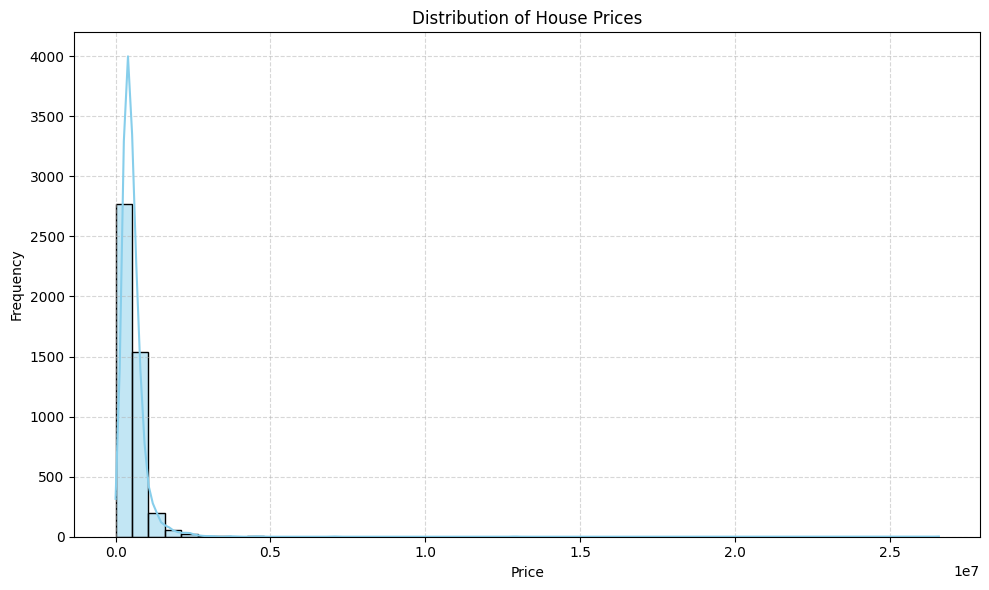

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## 🏠 Price Distribution Insight

The distribution of house prices in the dataset is **right-skewed**, which is typical for real estate data. Most properties fall within an **affordable or mid-range price**, while a **small number of high-end properties** dramatically increase the average and create a **long right tail**.

This skewness is likely influenced by **extreme outliers**, such as luxury homes or multi-unit estates. Such outliers can distort model training and performance.

👉 To address this, we may consider applying a **log transformation** to the `price` variable. This helps to:
- **Reduce skewness** and bring the distribution closer to normal,
- **Stabilize variance**, and
- **Improve model performance** for linear regression and other algorithms sensitive to non-normal targets.


**Number of Bedrooms**

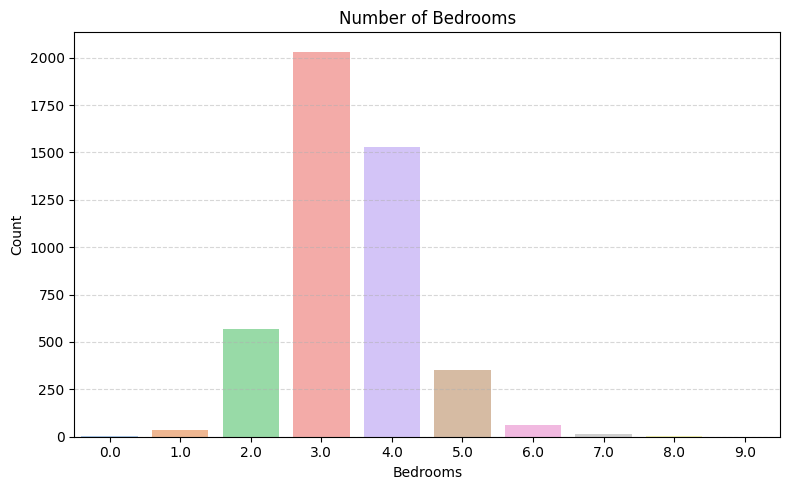

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='bedrooms', data=df, palette='pastel')
plt.title("Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Count")
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## 🛏 Distribution of Bedroom Counts

The bar chart titled **"Number of Bedrooms"** highlights the distribution of bedroom counts in the dataset and reveals a **strong positive skew**:

- The majority of properties have **3 bedrooms**, accounting for over **2,000 listings**.
- This is followed by **4-bedroom** properties (~1,500) and **2-bedroom** homes (approximately 500–600).
- **Properties with 0 or 1 bedroom** are rare, suggesting either studio-type accommodations or possible data entry issues.
- On the higher end, **homes with 5 or more bedrooms** occur infrequently, and the frequency drops off sharply for **6, 7, 8, or 9-bedroom** properties, which appear in negligible numbers.

📌 This skewed distribution aligns with real-world housing trends, where mid-sized family homes dominate the market. It also suggests that bedroom count could be treated as a **categorical variable** or binned into meaningful groups during feature engineering.


**Number of Bathrooms**

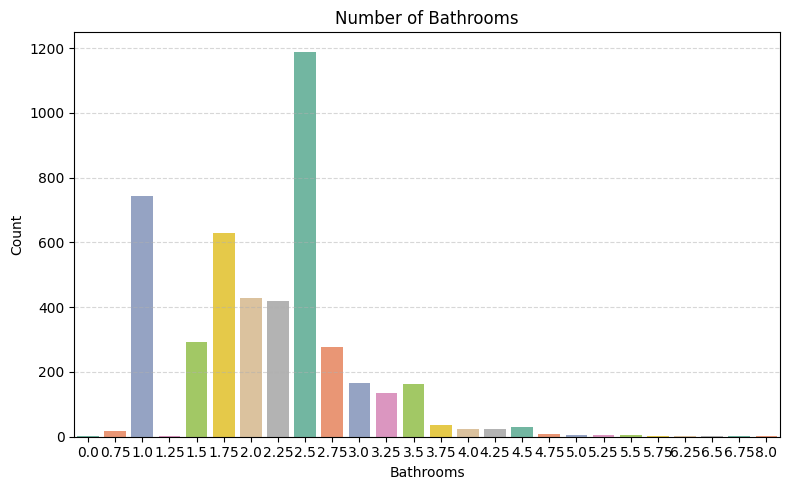

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='bathrooms', data=df, palette='Set2')
plt.title("Number of Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Count")
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## 🚿 Distribution of Bathroom Counts

The distribution of bathroom counts shows that most homes have between **1.0 and 2.5 bathrooms**, which aligns with common residential layouts:

- The **highest frequency** occurs at **2.5 bathrooms**, likely reflecting homes with **two full bathrooms and one half bath**.
- Several **fractional values** such as **1.75**, **2.25**, and **1.25** are present, indicating varying combinations of full and half bathrooms. These add useful nuance but may introduce complexity in modeling.
- **Extreme values** (e.g., 6 or more bathrooms) are **very rare**, suggesting either luxury properties or potential outliers.

📌 While `bathrooms` is a **valuable predictive feature**, the wide range of fractional values may create sparsity.  
👉 In the modeling phase, I may consider **binning ba**


**Price vs Condition**

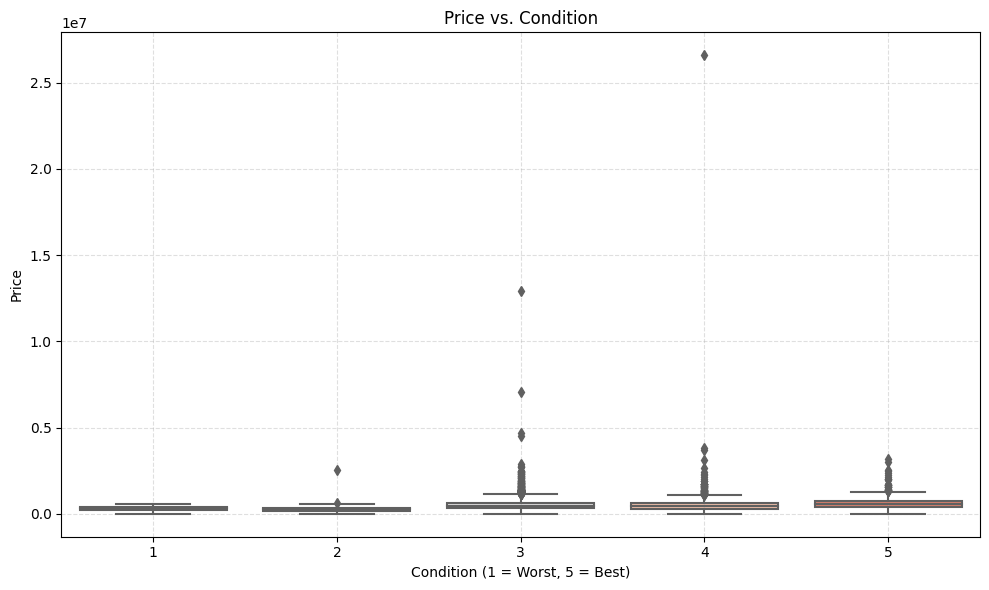

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=df, palette='coolwarm')
plt.title("Price vs. Condition")
plt.xlabel("Condition (1 = Worst, 5 = Best)")
plt.ylabel("Price")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

## 🏚️ House Price vs. Property Condition

This plot illustrates how house prices vary with the **overall condition** of the property, rated from **1 (worst)** to **5 (best)**.

- **Initial expectation**: A clear upward trend in price with improving condition.
- **Observed pattern**: While homes rated **4 or 5** do show **slightly higher median prices**, the **overall price ranges are quite similar** across all condition levels.
- There are **numerous outliers** in each category — particularly for condition **3 and 4**, where some houses are priced extremely high. These may reflect luxury properties or effects from other influential features.

📌 This suggests that `condition` alone may **not be a strong standalone predictor** of price.  
👉 It’s likely more effective when used in combination with features such as:
- `sqft_living` or `sqft_lot` (size),
- `location


**Price vs Sqft Living**

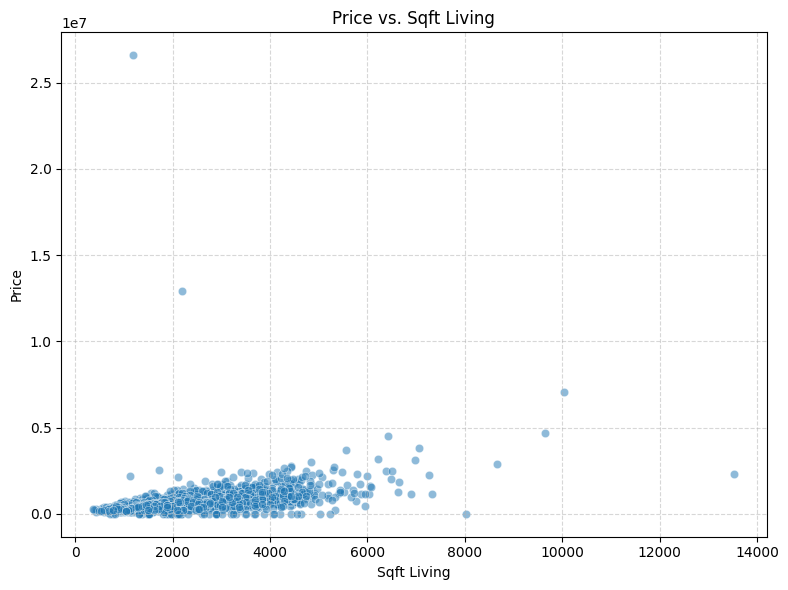

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.5)
plt.title("Price vs. Sqft Living")
plt.xlabel("Sqft Living")
plt.ylabel("Price")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## 📐 Price vs. Sqft Living – Scatter Plot Analysis

This scatter plot depicts the relationship between **living area (sqft)** and **house price**.

- As expected, there is a **general upward trend**: larger homes tend to be more expensive.
- However, the relationship is **not perfectly linear** nor tightly clustered.

### Key observations:
- Some **smaller homes are priced unusually high**, while a few **larger homes have lower-than-expected prices**.  
  This suggests that **additional factors** such as **location**, **renovation status**, or **lot size** play significant roles in determining price.
- A few **extreme values** appear on the far right, representing homes with **over 10,000 sqft**. These likely correspond to **luxury properties** and may be considered **outliers** for modeling purposes.

---

📌 These insights highlight the importance of incorporating multiple features and considering outlier treatment during preprocessing to improve model accuracy.


**Top 10 cities**

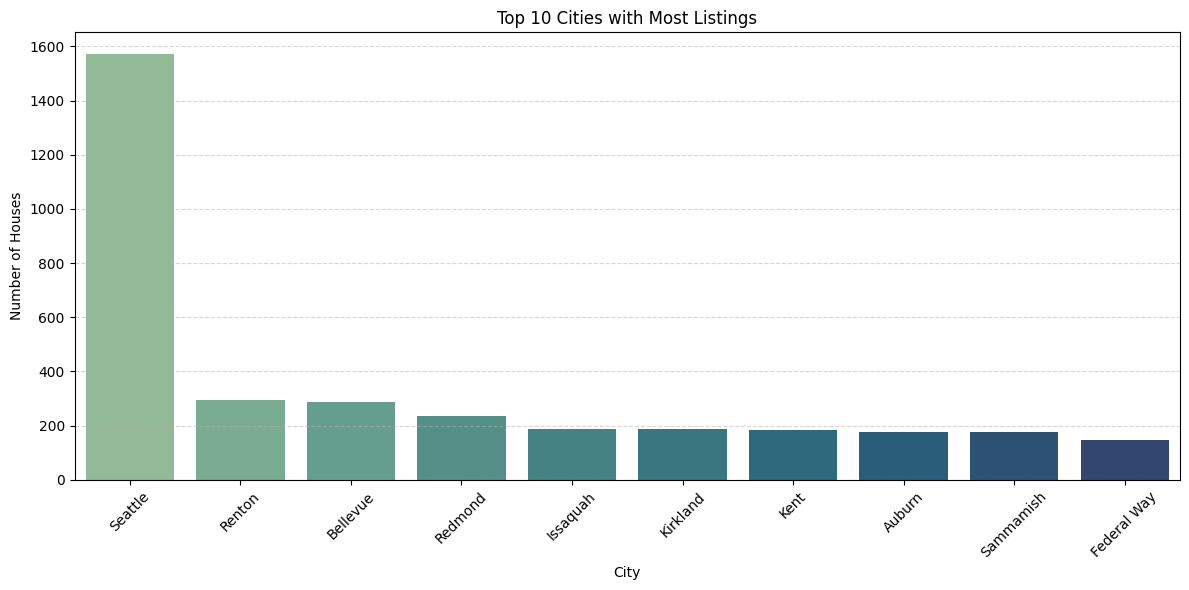

In [ ]:
plt.figure(figsize=(12, 6))
top_cities = df['city'].value_counts().nlargest(10).index
sns.countplot(data=df[df['city'].isin(top_cities)], x='city', order=top_cities, palette="crest")
plt.title("Top 10 Cities with Most Listings")
plt.xlabel("City")
plt.ylabel("Number of Houses")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## 🏙️ Top 10 Cities by Number of Listings – Analysis

This plot highlights the **top 10 cities** with the highest number of house listings:

- Unsurprisingly, **Seattle** overwhelmingly dominates the dataset, with far more listings than any other city.
- Other cities such as **Renton**, **Bellevue**, and **Redmond** have a notable number of listings but remain significantly behind Seattle.

📌 Given the strong imbalance, **location (city)** is likely a highly influential feature for modeling.  
👉 It will be important to explore how **average prices vary by city**, as this can help the model capture **local market differences** and improve predictive accuracy.


**Coorealtion Matrix**

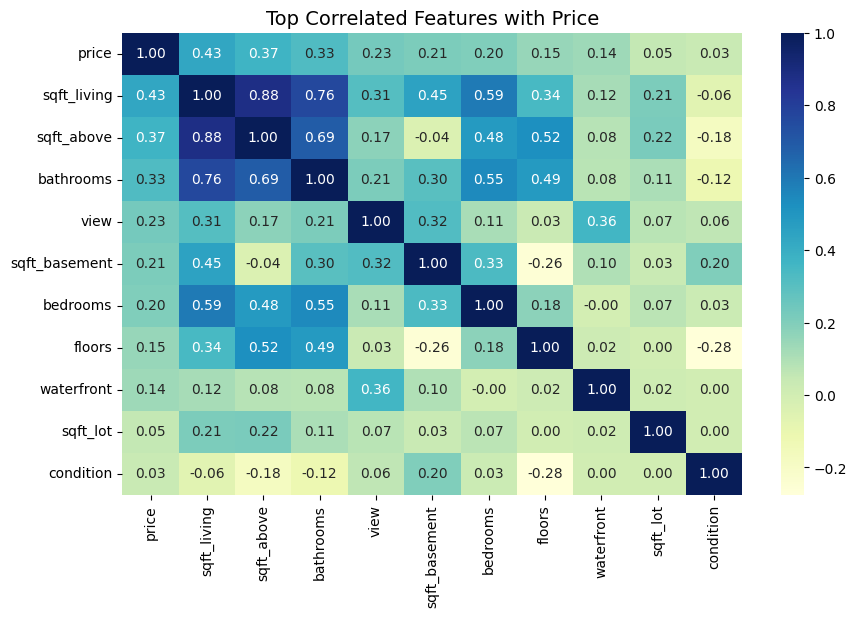

In [ ]:
# Correlation matrix for numeric columns
corr_matrix = df.corr(numeric_only=True)

# Top 10 features most correlated with price (including price itself)
top_corr = corr_matrix['price'].abs().sort_values(ascending=False).head(11)

# Heatmap of those features
plt.figure(figsize=(10, 6))
sns.heatmap(df[top_corr.index].corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Top Correlated Features with Price", fontsize=14)
plt.show()

## 📊 Correlation Analysis – Key Insights

The heatmap below shows the correlations between the target variable `price` and the top numerical features in the dataset.

- **↑ `sqft_living`** has the **strongest positive correlation** with price (**0.43**), indicating that larger living areas are a key predictor of higher house prices.
- **↑ `bathrooms`**, `sqft_above`, and `sqft_basement` also exhibit **moderate positive correlations**, making them valuable features for regression models.
- **↓ `bedrooms`**, `view`, and `floors` have **weaker but potentially useful relationships** with price.
- Features such as `sqft_lot` and `condition` show **very weak correlations**, suggesting limited predictive power.
  
⚠️ It’s important to monitor **multicollinearity**, particularly between `sqft_living` and `sqft_above`, as these features are closely related.

---

### Correlation Heatmap Code Example

```python
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant numeric columns for correlation analysis
features = ['price', 'sqft_living', 'bathrooms', 'sqft_above', 'sqft_basement',
            'bedr


**Outlier Detection and Removal**


To prevent extreme values from distorting model performance, I applied the **Interquartile Range (IQR) method** to detect and remove outliers from key numerical features.

### 💡 Why Use the IQR Method?

- The IQR measures the spread between the **25th percentile (Q1)** and the **75th percentile (Q3)**.
- Outliers are defined as values below **Q1 - 1.5 × IQR** or above **Q3 + 1.5 × IQR**.
- This method is robust and reduces the impact of extreme values, resulting in a more stable and generalizable model.

### 🚀 What We Did

Focused on detecting and removing outliers in the following features:

- **price**: To eliminate houses priced far above the typical market range.
- **sqft_living**: To remove homes with unusually large living areas.
- **bathrooms**: To exclude houses with an abnormally high number of bathrooms.
- **bedrooms**: To remove properties with unusual bedroom counts.
- **sqft_above**: To filter out homes with exceptionally large above-ground living spaces.
- **sqft_basement**: To exclude houses with extremely large basement areas.
- **sqft_lot**: To handle properties with unusually large lot sizes.

### 🔄 Methodology

1. **Identify Outliers:**  
   Calculate Q1, Q3, and IQR for each selected numerical feature.  
   Determine the **lower** and **upper bounds** using the formula:  
   `Lower bound = Q1 - 1.5 × IQR`  
   `Upper bound = Q3 + 1.5 × IQR`
2. **Remove Outliers:**  
   Filter the dataset to include only records within these bounds for each feature.

### Outcome

- This process **significantly reduced extreme values**, leading to a more consistent dataset.
- It enables the model to focus on **meaningful, generalizable patterns** rather than noise caused by outliers.

---




In [ ]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound

    # Filter data within the calculated bounds
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

# Displaying initial shape of the dataset
print(f"Original dataset shape: {df.shape}")

# Columns to clean (based on domain knowledge and model requirements)
columns_to_clean = ['price', 'sqft_living', 'bathrooms', 'bedrooms', 'sqft_above', 'sqft_basement', 'sqft_lot']

# Removing outliers for each selected column
for col in columns_to_clean:
    original_shape = df.shape[0]  # Initial row count
    df = remove_outliers_iqr(df, col)  # Removing outliers
    new_shape = df.shape[0]  # Row count after outlier removal
    # Print how many outliers were removed
    print(f"Removed {original_shape - new_shape} outliers from '{col}' column.")

# Final shape after outlier removal
print(f"\nFinal dataset shape after outlier removal: {df.shape}")

# Summary of the cleaned data
print("\nCleaned Data Overview:")
print(df.describe())

Original dataset shape: (4600, 18)
Removed 240 outliers from 'price' column.
Removed 76 outliers from 'sqft_living' column.
Removed 53 outliers from 'bathrooms' column.
Removed 81 outliers from 'bedrooms' column.
Removed 63 outliers from 'sqft_above' column.
Removed 55 outliers from 'sqft_basement' column.
Removed 444 outliers from 'sqft_lot' column.

Final dataset shape after outlier removal: (3588, 18)

Cleaned Data Overview:
              price     bedrooms    bathrooms  sqft_living      sqft_lot  \
count  3.588000e+03  3588.000000  3588.000000  3588.000000   3588.000000   
mean   4.610013e+05     3.280100     2.018464  1881.248328   7086.753902   
std    2.018767e+05     0.779136     0.653626   647.754684   3406.775422   
min    0.000000e+00     2.000000     0.750000   580.000000    681.000000   
25%    3.080000e+05     3.000000     1.500000  1390.000000   4725.000000   
50%    4.300000e+05     3.000000     2.000000  1830.000000   7068.000000   
75%    5.800000e+05     4.000000    

Using the IQR (Interquartile Range) method, I removed outliers from key numerical features to enhance model stability and accuracy.

## 🧹 Outlier Removal Process

We targeted the following numerical columns to eliminate extreme values:

- **price:** To remove houses with excessively high prices.
- **sqft_living:** To eliminate unusually large living areas.
- **bathrooms:** To filter out properties with an exceptionally high number of bathrooms.
- **bedrooms:** To remove houses with an abnormal number of bedrooms.
- **sqft_above:** To eliminate homes with extremely large above-ground living spaces.
- **sqft_basement:** To remove properties with very large basement areas.
- **sqft_lot:** To filter out houses with exceptionally large lot sizes.

---

## 📊 Outlier Removal Summary

- Using the **IQR method**, we successfully removed **1,012 outliers** from the dataset.
- This reduced the dataset size from **4,600 to 3,588 rows**, significantly improving data consistency.
- The cleaned dataset now exhibits a **more stable distribution**, minimizing the influence of extreme values.


**Feature Engineering**

**New Features Created**

year_sold: Extracted from the date column.
house_age: Calculated by subtracting the year the house was built from the year it was sold.
has_been_renovated: A binary feature that shows whether the house was renovated or not.

**Dropped Columns**

date, yr_renovated, yr_built, street, and country are removed because they are either not useful or hard to process in their raw form

In [ ]:
# Extract year from date
df['year_sold'] = pd.to_datetime(df['date']).dt.year

# Create house age
df['house_age'] = df['year_sold'] - df['yr_built']

# Create binary renovation flag
df['has_been_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# Drop unnecessary columns
df.drop(['date', 'yr_renovated', 'yr_built', 'street', 'country'], axis=1, inplace=True)

# Show updated DataFrame
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,statezip,year_sold,house_age,has_been_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,WA 98133,2014,59,1
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,WA 98042,2014,48,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,WA 98008,2014,51,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,WA 98052,2014,38,1
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,Seattle,WA 98115,2014,76,1


## 🔧 Feature Engineering Update

The dataset has been enhanced with new, meaningful features:

- **year_sold:** Extracted from the original `date` column.
- **house_age:** Calculated as the difference between `year_sold` and `yr_built`.
- **has_been_renovated:** A binary feature where  
  - `1` indicates the house has been renovated (`yr_renovated` > 0)  
  - `0` means no renovation.

Additionally, we dropped the following columns to streamline the dataset:

- `date`
- `yr_renovated`
- `yr_built`
- `street`
- `country`

---

As a result, the updated dataset is cleaner and more informative, making it well-prepared for encoding and modeling.


**Data Preprocessing: Encoding, Scaling & Train/Test Split**

## 🔄 Data Preprocessing: Encoding, Scaling & Train/Test Split

Before training models, the data needs to be properly prepared through encoding, scaling, and splitting.

### Steps:

- **Encoding:**  
  Convert categorical features (e.g., `city`, `statezip`, `condition`, `view`) into numerical format using **One-Hot Encoding**.

- **Scaling:**  
  Normalize numerical features to ensure consistent scale, helping models learn more effectively.

- **Train/Test Split:**  
  Split the dataset into **80% training** and **20% testing** sets for unbiased model evaluation.

To streamline this process, I will use a **ColumnTransformer** and **Pipeline** to apply all preprocessing steps consistently across models.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Target & Features
X = df.drop("price", axis=1)
y = df["price"]

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Numerical and categorical features
numeric_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                    'sqft_above', 'sqft_basement', 'house_age']
categorical_features = ['waterfront', 'view', 'condition', 'city', 'statezip', 'has_been_renovated']

# Define transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

**Modeling (Model Training)**

## 🏗️ Modeling (Model Training)

In this step, I will train multiple regression models using the training dataset.

- Each model will be trained within a **pipeline** that includes preprocessing steps:  
  - Scaling numerical features  
  - Encoding categorical variables

- To streamline the process, I will organize the models in a **dictionary** and loop through them.  
  This approach allows efficient training and easy saving of each model for later evaluation.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# create model list
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

# store the trained models here
trained_models = {}

# train each model
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    trained_models[name] = pipeline

**Model Evaluation & Comparison**

## 🎯 Model Evaluation

In this step, I will evaluate each trained regression model using the test dataset to compare their predictive performance and identify the most accurate one.

### Evaluation Metrics:

- **MAE (Mean Absolute Error):**  
  Measures the average magnitude of prediction errors, providing a straightforward interpretation of model accuracy.

- **RMSE (Root Mean Squared Error):**  
  Similar to MAE but penalizes larger errors more heavily, highlighting models that make large mistakes.

- **R² Score (Coefficient of Determination):**  
  Indicates how we


 Linear Regression – Evaluation


 Linear Regression is one of the simplest and most commonly used regression models. It assumes a linear relationship between the features and the target variable.

I will use the trained Linear Regression model to make predictions on the test data.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Get the trained Linear Regression pipeline
lr_model = trained_models["Linear Regression"]

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Calculate evaluation metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Print results
print("Linear Regression Evaluation Metrics:")
print(f"MAE  = {mae_lr:.2f}")
print(f"RMSE = {rmse_lr:.2f}")
print(f"R²   = {r2_lr:.4f}")

Linear Regression Evaluation Metrics:
MAE  = 66894.61
RMSE = 104617.65
R²   = 0.7374


## 📈 Linear Regression Summary

- **MAE (Mean Absolute Error):** Approximately \$66,894 — on average, the model’s predictions deviate from actual prices by about \$66K.
- **RMSE (Root Mean Squared Error):** Around \$104,615 — this higher value suggests the presence of some larger errors the model struggles to capture.
- **R² Score:** 0.7374 — the model explains about 73.7% of the variance in house prices.

While these results are reasonable, the relatively high error values indicate that the linear regression model might be too simple for this problem. It likely fails to capture more complex, non-linear relationships in the data.

---

**Next Steps:**  
I will experiment with more advanced models to reduce errors and improve overall prediction accuracy.
